# **A Statistical Study of Exoplanet Radius and Orbital Period Using NASA Exoplanet Archive Data**
Team 2 : High on Scipy
1.Dheeraj Kumar (23b0048) 


2.Jagdish Sajeesh (23b0004) 


3.Manthan Saskawade(22b0452) 


4.Akshay Venugopalan(23b0057) 


5.Hrishikesh Vijay Mavily(23b0052)

NASA Exoplanet Archive dataset link: https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=cumulative


Link to video: https://drive.google.com/drive/folders/10x7wATua5DUr9hZUhoOYA403ho832Yaf?usp=sharing

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
df = pd.read_csv(r"cumulative_2025.04.09_07.43.58.csv")  
df_sorted = df
df_filtered = df_sorted[(df_sorted['koi_steff'] < 7000) & (df_sorted['koi_steff']>4000) & (df_sorted['koi_period']>100) & (df_sorted['koi_period']<600)]
print(len(df_filtered))

1305


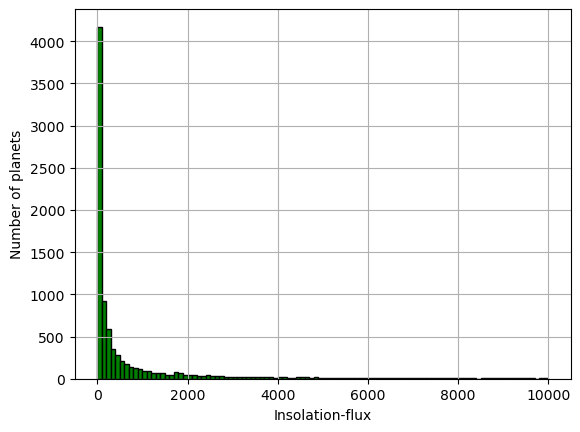

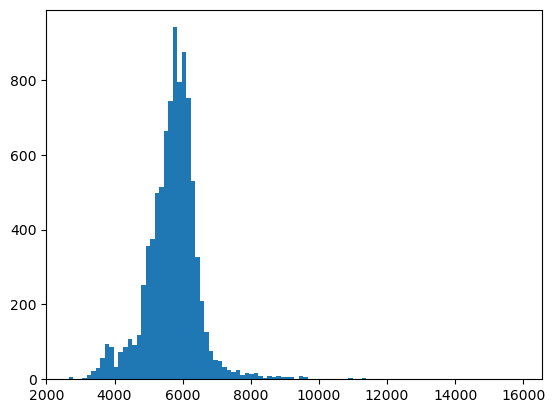

In [16]:
df1 = df[df['koi_insol']<10000]
#plotting the histogram of the insolation flux which is the amount of sunlight received by an exoplanet compared to earth.
plt.hist( df1['koi_insol'],bins=100,color='green',edgecolor='black')
plt.xlabel('Insolation-flux')
plt.ylabel('Number of planets')
plt.grid(True)
plt.show()

x = df['koi_steff'].values #This is the star temperature 
plt.hist(x,bins=100);
plt.show()


Fitting the data with a known distribution: Exponential distribution

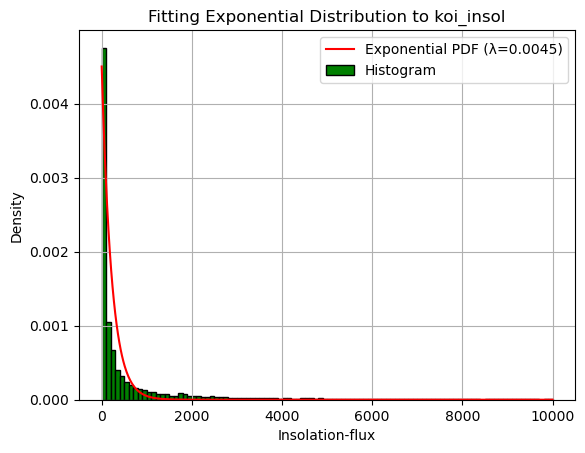

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# Filter the data
df1 = df[df['koi_insol'] < 10000]
data = df1['koi_insol']

# Parameters for the exponential distribution
lambda_param = 0.0045 
scale = 1 / lambda_param

x = np.linspace(0, 10000, 1000)
pdf = expon.pdf(x, scale=scale)

# Plot histogram and fitted curve
plt.plot(x, pdf, 'r-', label=f'Exponential PDF (λ={lambda_param})')
plt.hist(data, bins=100, color='green', edgecolor='black', density=True, label='Histogram')

plt.xlabel('Insolation-flux')
plt.ylabel('Density')
plt.grid(True)
plt.legend()
plt.title('Fitting Exponential Distribution to koi_insol')
plt.show()

**Null Hypothesis:**

Exoplanets with star temperature (4000 - 7000 K) and orbital period (100 - 600 days) have a mean insolation flux of 1.0 Earth units. (μ = 1.0)


**Alternate Hypothesis:**

Exoplanets with star temperature (4000 - 7000 K) and orbital period (100 - 600 days) don't have a mean insolation flux of 1.0 Earth units. (μ != 1.0)



The reason we are testing this is to identify whether the Earth is an anomaly compared to other exoplanets of similar conditions.

6.809302456
0.9999683287581669
327.15196428826164
0.0
Null rejected


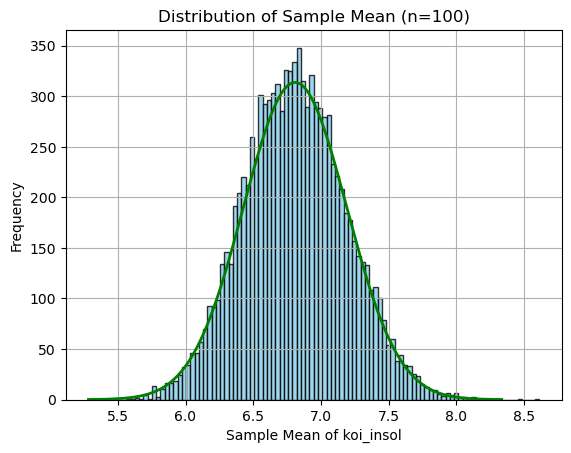

In [18]:
sample_means = []

# Repeat sampling 1000 times
for _ in range(10000):
    sample = df_filtered['koi_insol'].sample(n=3000, replace=True)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)
mu = np.mean(sample_means)
sigma = np.std(sample_means)
print(mu)

# Plot histogram of sample means
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)

print(norm.cdf((4)))
print((norm.pdf(x, mu, sigma)).sum())
plt.plot(x, 300*norm.pdf(x, mu, sigma), 'g', lw=2, label='Normal Curve')
plt.hist(sample_means, bins=100, color='skyblue', edgecolor='black', alpha=0.8)
plt.xlabel("Sample Mean of koi_insol")
plt.ylabel("Frequency")
plt.title("Distribution of Sample Mean (n=100)")
plt.grid(True)
mu_0 = 1.0


z = (mu - mu_0) / (sigma) #Z-score


p_value = 2*(1 - norm.cdf(abs(z)))
print(p_value)
if p_value < 0.01:
    print('Null rejected')
else:
    print('Null accepted')
plt.show()

In [19]:
#We are going to get correlation betweeen the insolation flux and star temperature, ideally it should be greater than 1 but cannot say due to other factors, we are going to test it
df2=df1[(df1['koi_period']>100) & (df1['koi_period']<600)]
print(df2['koi_insol'].corr(df2['koi_steff']))

-0.10969051011727234


**Null Hypothesis:**

The mean of the regression slope of log(Orbital Period) vs log(Insolation Flux) is zero. (Slope = 0)


**Alternate Hypothesis:**

The mean of the regression slope of log(Orbital Period) vs log(Insolation Flux) is not zero. (Slope !=0)



Due to the non-linear relationship between Orbital Period and Insolation Flux, we are plotting a log-log plot of the two random variables in order to make it easier to analyze using linear regression.

C:\Users\Akshay Venugopalan\AppData\Local\Temp\ipykernel_71972\3416492853.py:7: RuntimeWarning: divide by zero encountered in log
  y = np.log(df3['koi_insol'].values)
C:\Users\Akshay Venugopalan\AppData\Local\Temp\ipykernel_71972\3416492853.py:17: RuntimeWarning: divide by zero encountered in log
  y1 = np.log(df_sample['koi_insol'].values)


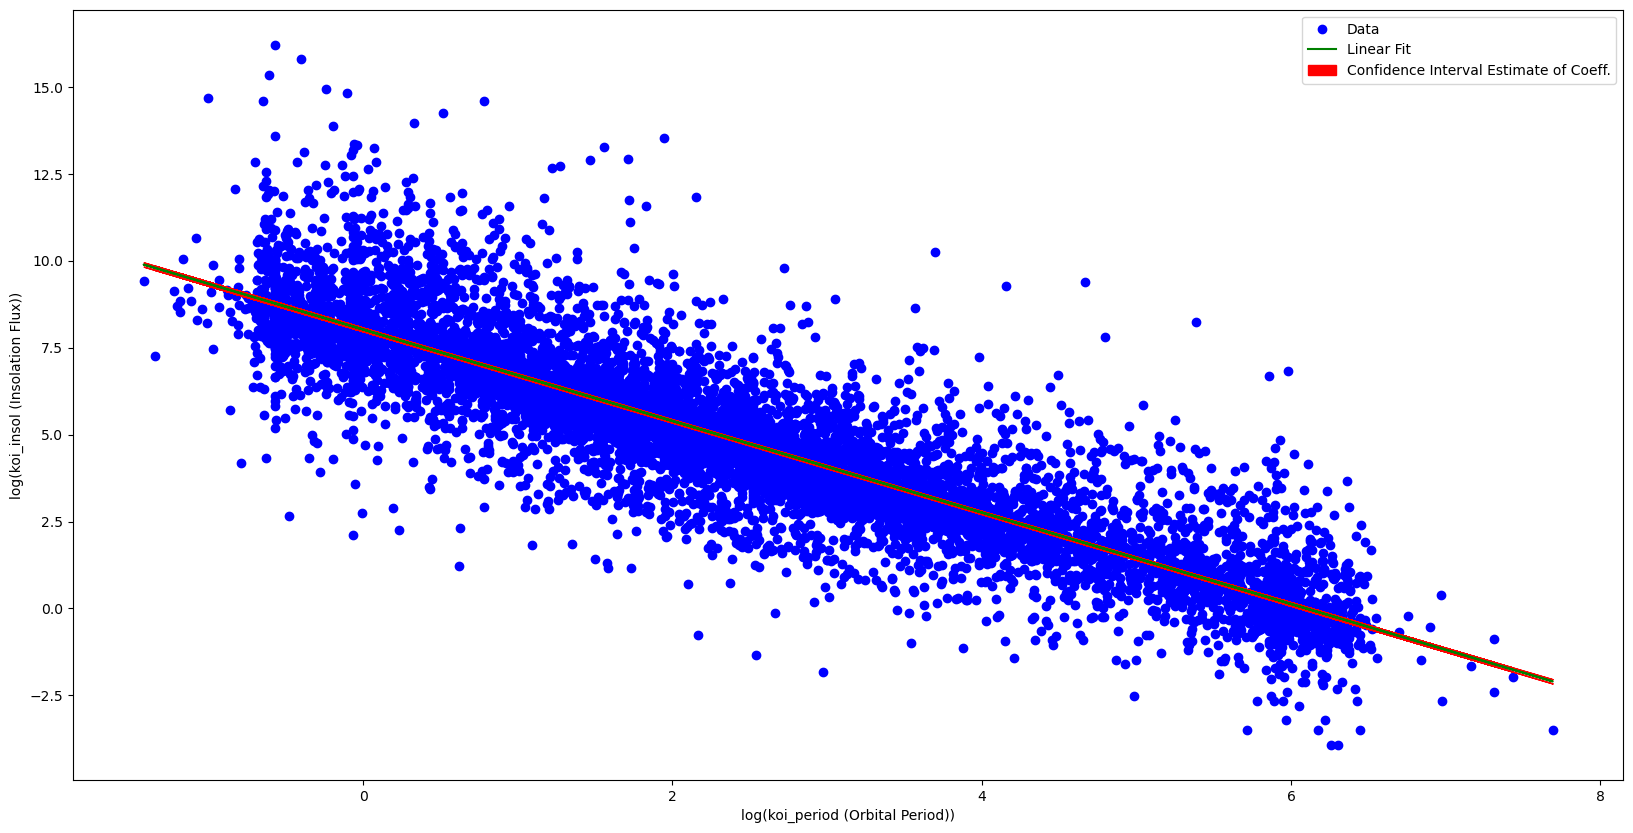

In [20]:
alpha = []
yps = []
cs = []

df3 = df.sort_values(by='koi_insol')
x = np.log(df3['koi_period'].values)
y = np.log(df3['koi_insol'].values)

flag = np.isfinite(x) & np.isfinite(y)
x = x[flag]
y = y[flag]

# Bootstrap
for _ in range(100):
    df_sample = df.sample(n=len(df), replace=True)
    x1 = np.log(df_sample['koi_period'].values)
    y1 = np.log(df_sample['koi_insol'].values)

    flag1 = np.isfinite(x1) & np.isfinite(y1)
    x1 = x1[flag1]
    y1 = y1[flag1]

    coef = np.polyfit(x1, y1, 1)
    alpha.append(coef[0])
    cs.append(coef[1])

    yp1 = coef[0]*x + coef[1]
    yps.append(yp1)

# Point estimate
yp_mean = np.mean(alpha) * x + np.mean(cs)

# Compute percentiles
low, high = np.percentile(yps, [5, 95], axis=0)


plt.figure(figsize=(20, 10))
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x, yp_mean, label='Linear Fit', color='green')
plt.fill_between(x, low, high, alpha=1, color = 'red', label='Confidence Interval Estimate of Coeff.')
plt.xlabel('log(koi_period (Orbital Period))')
plt.ylabel('log(koi_insol (Insolation Flux))')
plt.legend()
plt.show()


The mean of the slope is not equal to zero. Thus, we can say that there is a slight correlation between Insolation Flux and Orbital Period 